# SmartBeds - Análisis de componentes principales

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [2]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plot

## Lectura
### Lectura de los datos

In [3]:
import loadData as ld

datos = ld.load(r"../data/")

datos = ld.preprocess(datos)

In [4]:
print(len(datos))
datos.head()

4482391


,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
0,2018-10-30 21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False
1,2018-10-30 21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2,2018-10-30 21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,2018-10-30 21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False
4,2018-10-30 21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False


In [5]:
## Paramos a True a los target entre las 3:30 del dia 10 de noviembre hasta las 3:50
datos = ld.newSeizure(datos,'2018-11-10 3:30:00',60*20)
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
0,2018-10-30 21:20:23,3.0,27.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False
1,2018-10-30 21:20:23,3.0,26.0,28.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2,2018-10-30 21:20:23,3.0,25.0,27.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,2018-10-30 21:20:24,4.0,26.0,28.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False
4,2018-10-30 21:20:25,4.0,26.0,29.0,23.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,False


## Componentes principales

In [6]:
from sklearn.decomposition import PCA

### Datos Brutos

In [7]:
data = datos.iloc[:,1:13]
pcaB = PCA(n_components=2).fit_transform(data)

Text(0.5, 1.0, 'PCA Raw')

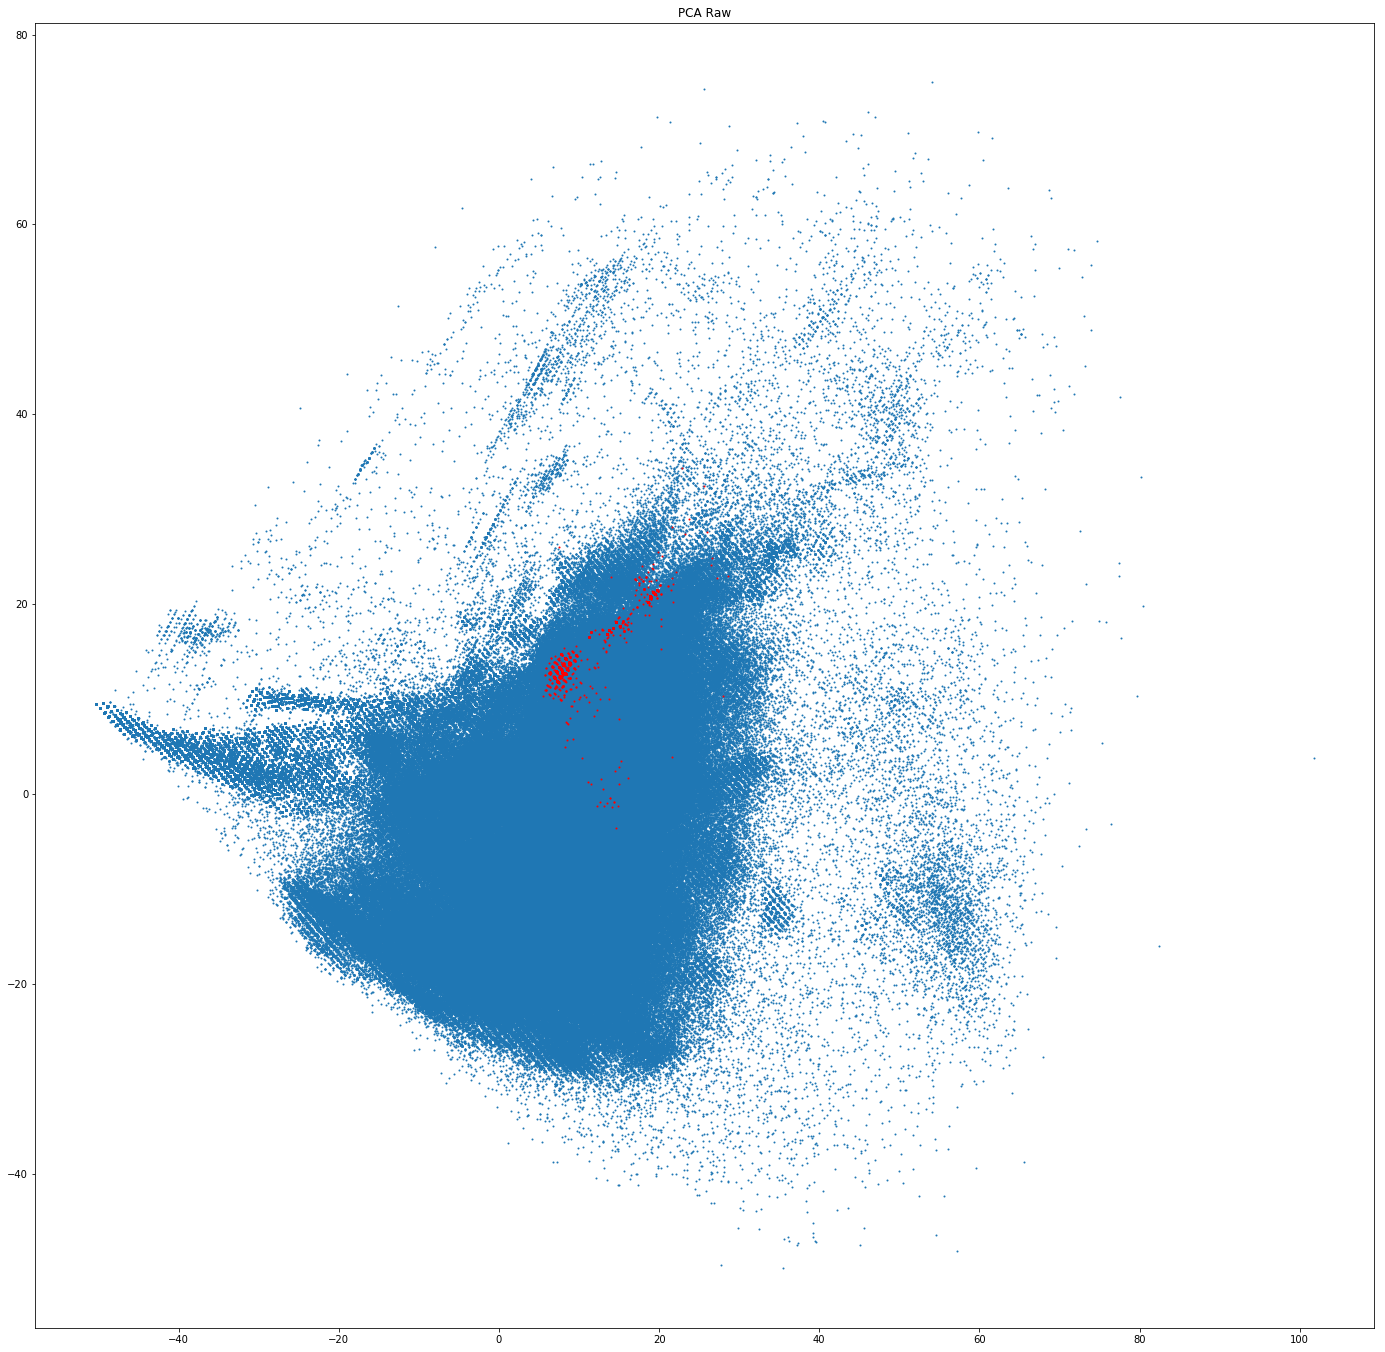

In [8]:
plt.figure(figsize=(24,24))
pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('PCA Raw')


### Estadísticas móviles

#### Widgets

In [9]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=25,
    min=1,
    max=50,
    description='Ventana:',
    readout=True,
    readout_format='d'
)

button = widgets.Button(
    description='Calcular'
)

progress = widgets.IntProgress(
    value=0,
    min=0,
    max=24,
    step=1,
    description='Procesado:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

hb = widgets.HBox([slider,button,progress])

In [10]:
display(hb)

datosEstadisticos = datos.copy()

def estadisticos(b):
    global slider, datosEstadisticos, progress
    
    progress.value = 0
    
    before = b.description
    b.description='Espera'

    print(" "*100,end='\r')
    
    ventanaMedia = slider.value
    
    for i in range(1,13):
        nombre_col = 'P'+str(i)
        nombre_col_mean = nombre_col+' mean'
        datosEstadisticos[nombre_col_mean] = datosEstadisticos[nombre_col].rolling(ventanaMedia).mean()
        progress.value += 1

    datosEstadisticos.head()

    ventanaDesviacion = ventanaMedia

    for i in range(1,13):
        nombre_col = 'P'+str(i)
        nombre_col_std = nombre_col+' std'
        datosEstadisticos[nombre_col_std] = datosEstadisticos[nombre_col].rolling(ventanaDesviacion).std()
        progress.value += 1
        
    print('Calculos realizados para ventana a',ventanaMedia,end="\r")
    b.description = before

button.on_click(estadisticos)

In [11]:
data = datosEstadisticos.dropna()
data = data.iloc[:,14:]
data.head() 

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,P9 mean,P10 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
24,2.92,25.32,28.36,23.36,2.16,0.0,1.16,0.0,0.0,0.0,...,1.350309,1.439907,0.624500,0.0,0.6245,0.0,0.0,0.0,0.476095,0.0
25,2.92,25.20,28.32,23.36,2.16,0.0,1.16,0.0,0.0,0.0,...,1.345362,1.439907,0.624500,0.0,0.6245,0.0,0.0,0.0,0.476095,0.0
26,2.92,25.08,28.28,23.36,2.20,0.0,1.16,0.0,0.0,0.0,...,1.369915,1.439907,0.577350,0.0,0.6245,0.0,0.0,0.0,0.476095,0.0
27,2.88,25.00,28.28,23.40,2.24,0.0,1.16,0.0,0.0,0.0,...,1.369915,1.414214,0.522813,0.0,0.6245,0.0,0.0,0.0,0.476095,0.0
28,2.84,24.84,28.24,23.36,2.20,0.0,1.12,0.0,0.0,0.0,...,1.392839,1.439907,0.500000,0.0,0.6000,0.0,0.0,0.0,0.458258,0.0


In [12]:
medias = data.iloc[:,0:12]
desv = data.iloc[:,12:]

pcaM = PCA(n_components=2).fit_transform(medias)
pcaD = PCA(n_components=2).fit_transform(desv)
pcaMD = PCA(n_components=2).fit_transform(data)

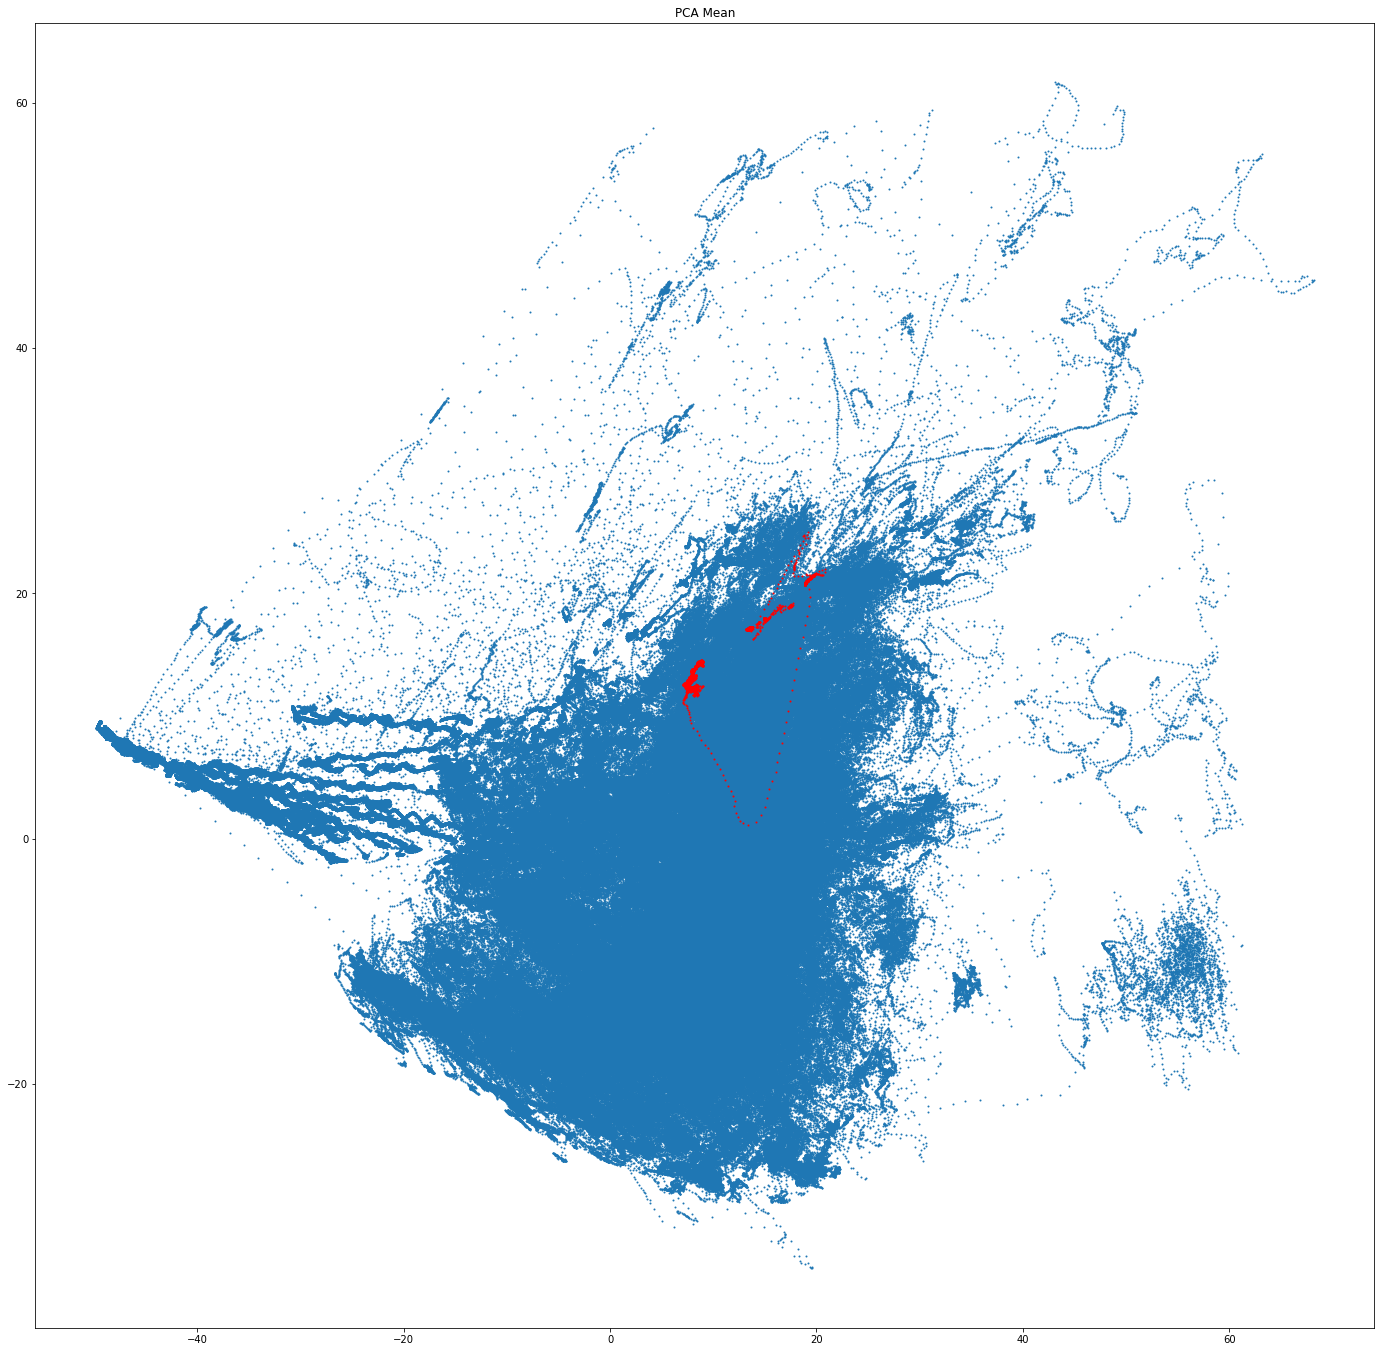

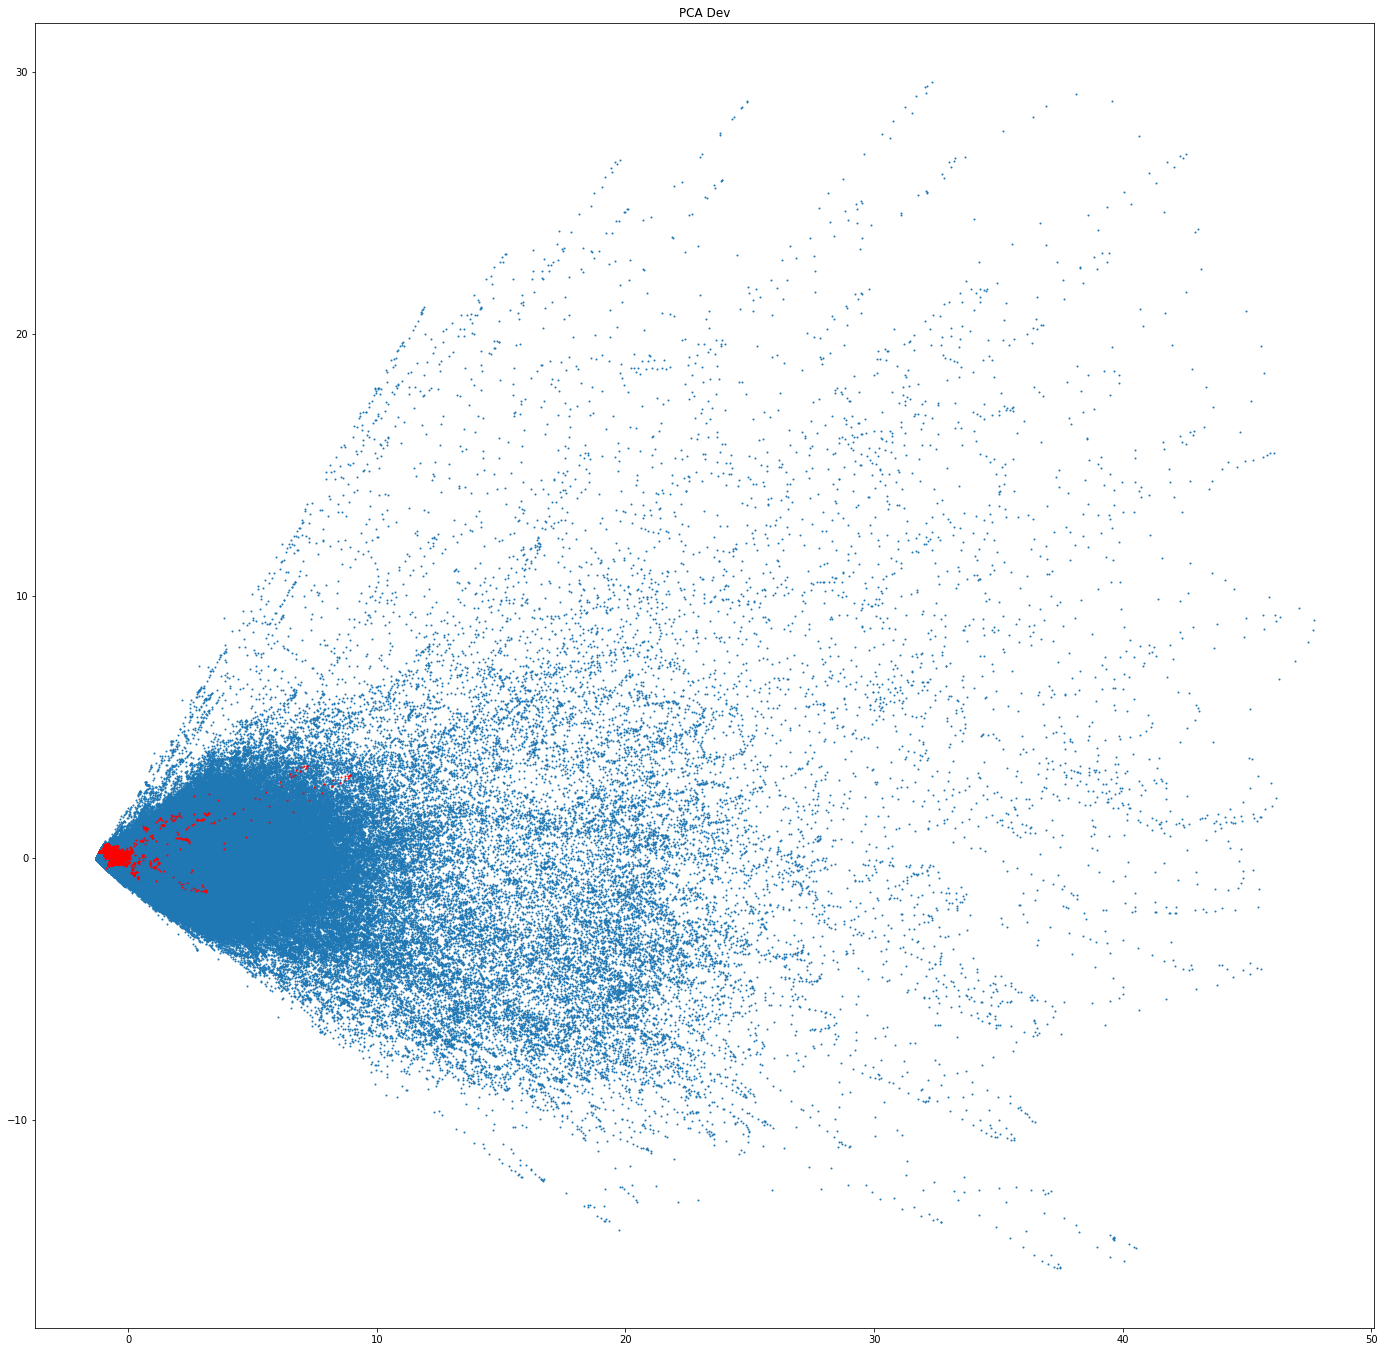

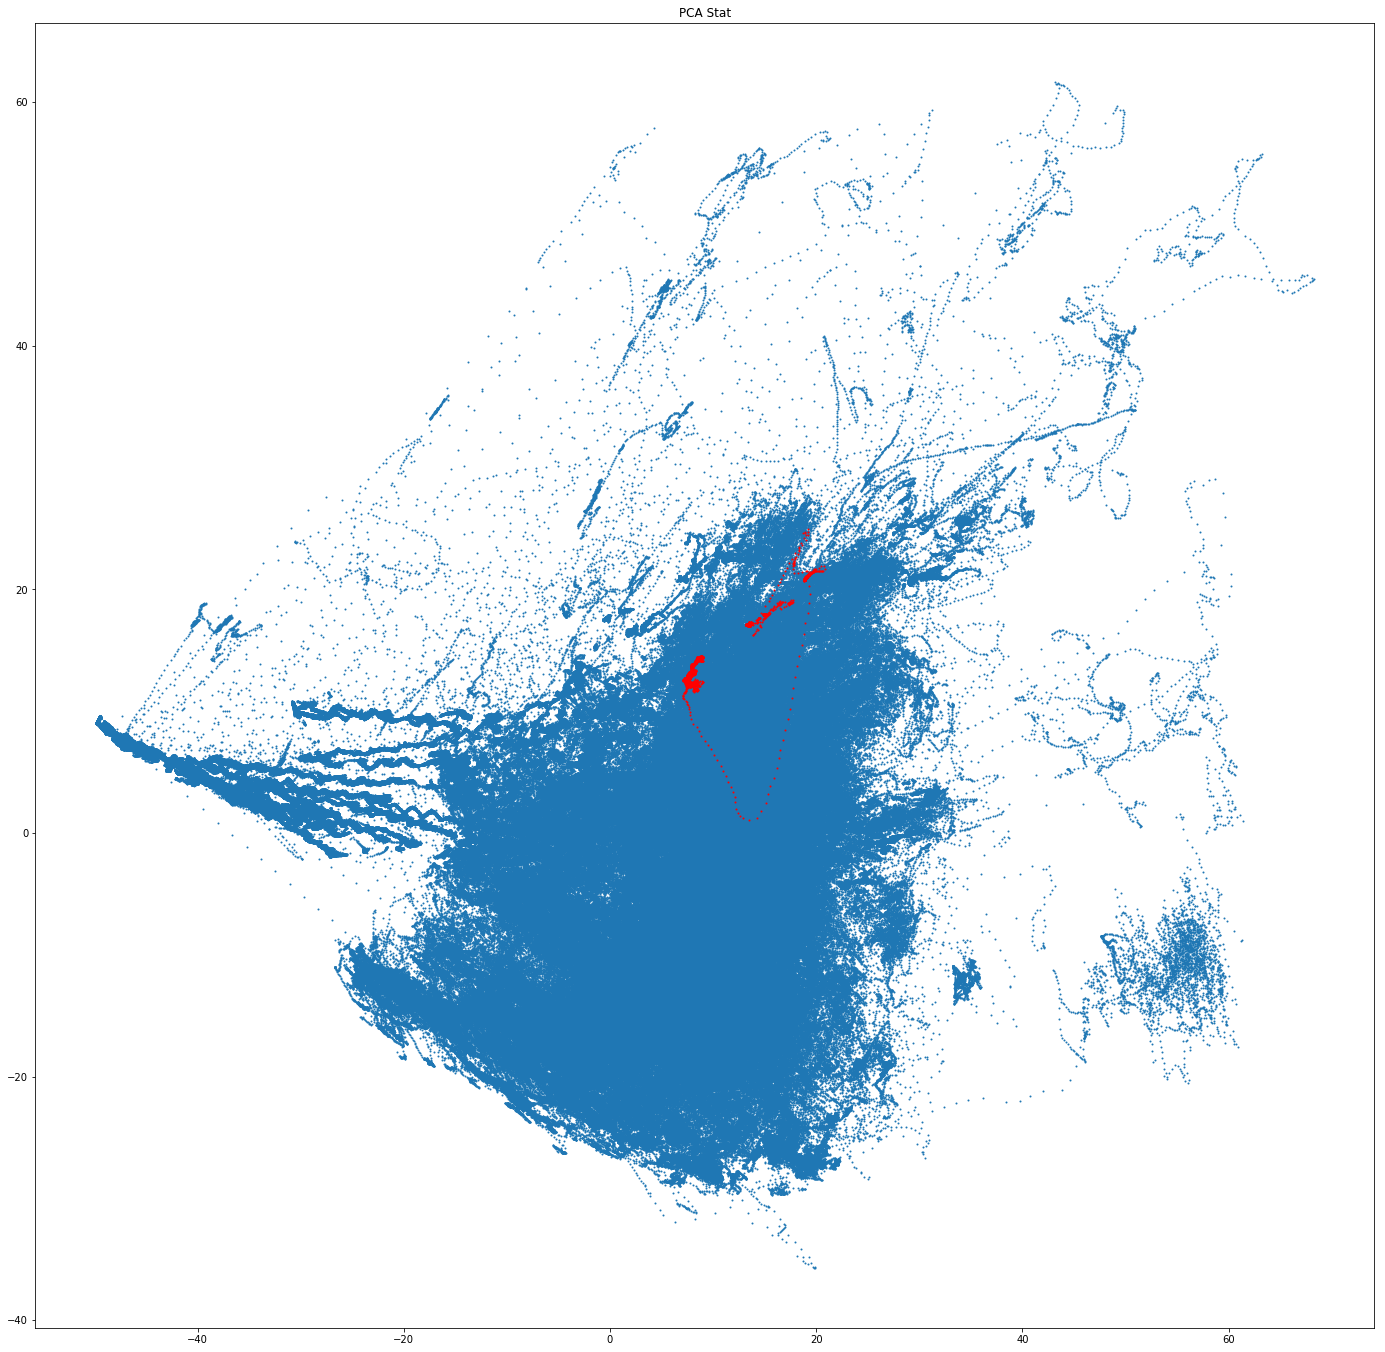

In [13]:

target = datosEstadisticos.dropna()['target'].values
notTarget = np.logical_not(target)

sct = [pcaM,pcaD,pcaMD]
tit = ['Mean','Dev','Stat']
for i in range(len(sct)):
    pcaSample = sct[i]#sct[i][np.random.choice(sct[i].shape[0], int(4e4), replace=False), :]
    serie = pd.DataFrame(pcaSample)

    X = pd.Series(serie[0]).loc[notTarget]
    Y = pd.Series(serie[1]).loc[notTarget]

    X_t = pd.Series(serie[0]).loc[target]
    Y_t = pd.Series(serie[1]).loc[target]
    
    plt.figure(figsize=(24,24))
    
    plt.scatter(X,Y,s=1)
    plt.scatter(X_t,Y_t,s=1,c='r')
    plt.title('PCA '+tit[i])

## Componentes principales - tridimencional

### Datos Brutos

In [14]:
data = datos.iloc[:,1:13]
pcaB = PCA(n_components=3).fit_transform(data)

Text(0.5, 0.92, 'PCA Raw')

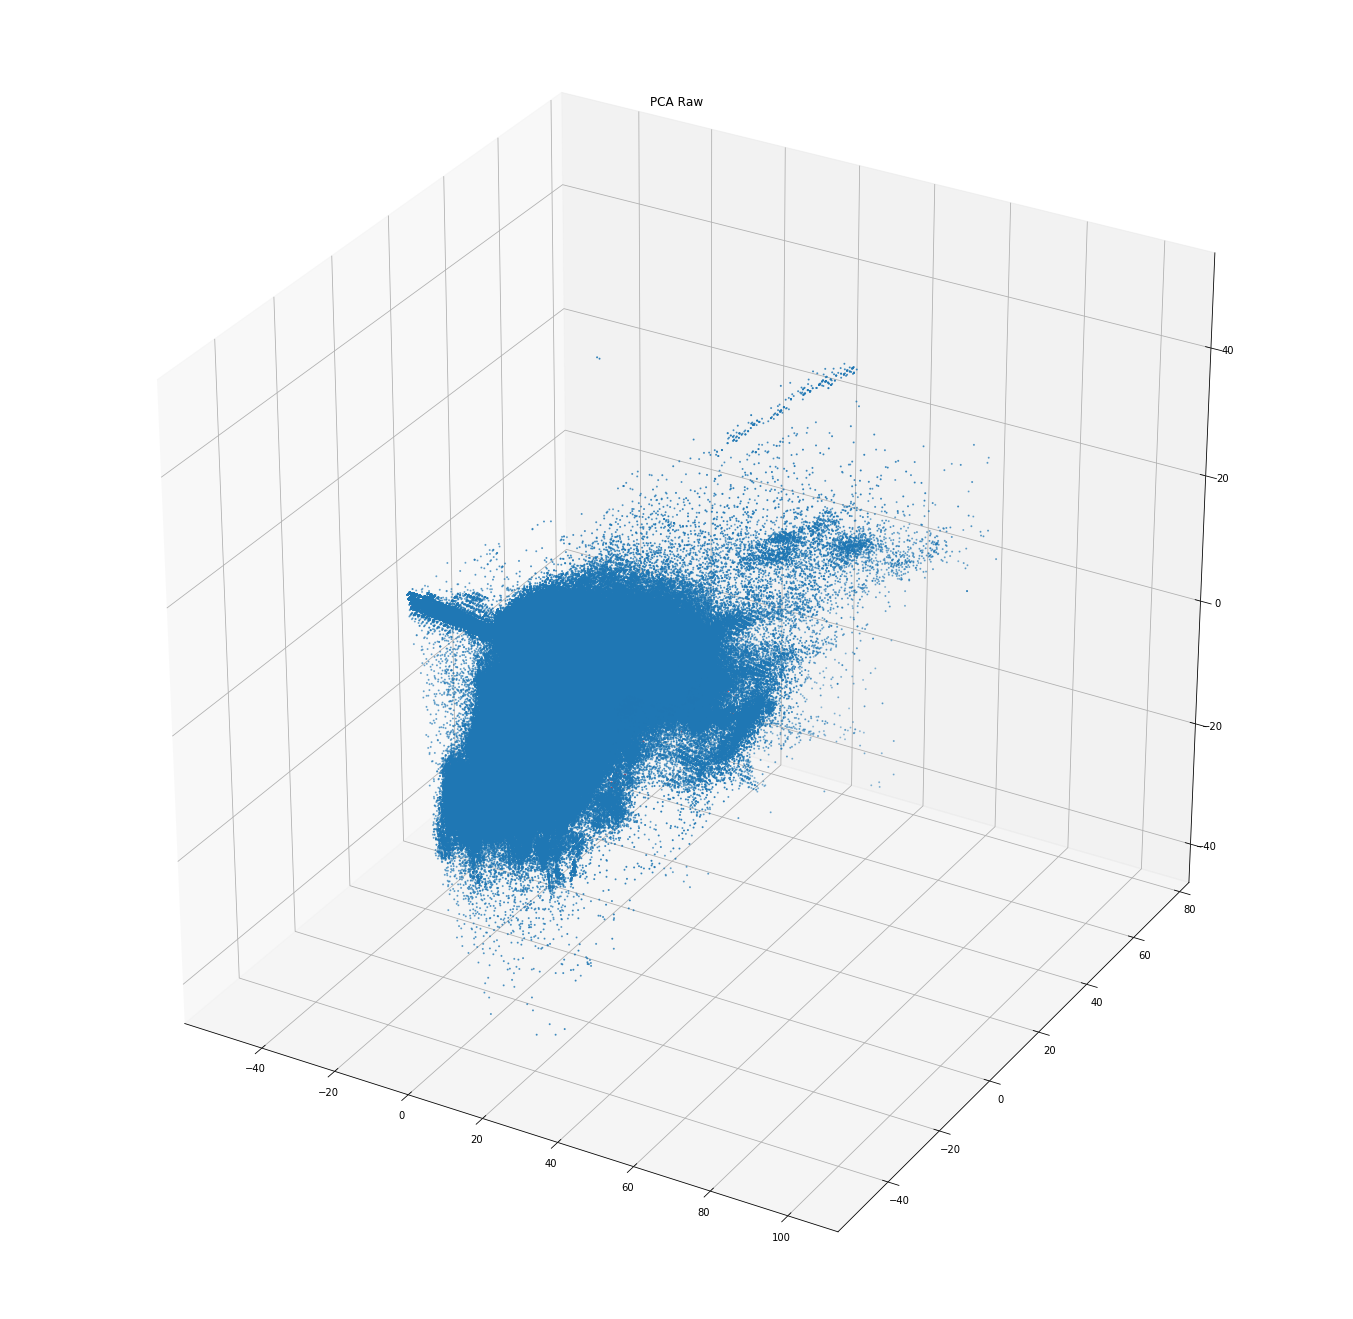

In [15]:
import mpl_toolkits.mplot3d

fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(111, projection='3d')

pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]
Z = pd.Series(serie[2]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]
Z_t = pd.Series(serie[2]).loc[target]

ax.scatter(X,Y,Z,s=1)
ax.scatter(X_t,Y_t,Z_t,s=1,c='r')
plt.title('PCA Raw')
